<a href="https://colab.research.google.com/github/Tommy3072/MineriaDeDatos/blob/main/VariaciondeC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

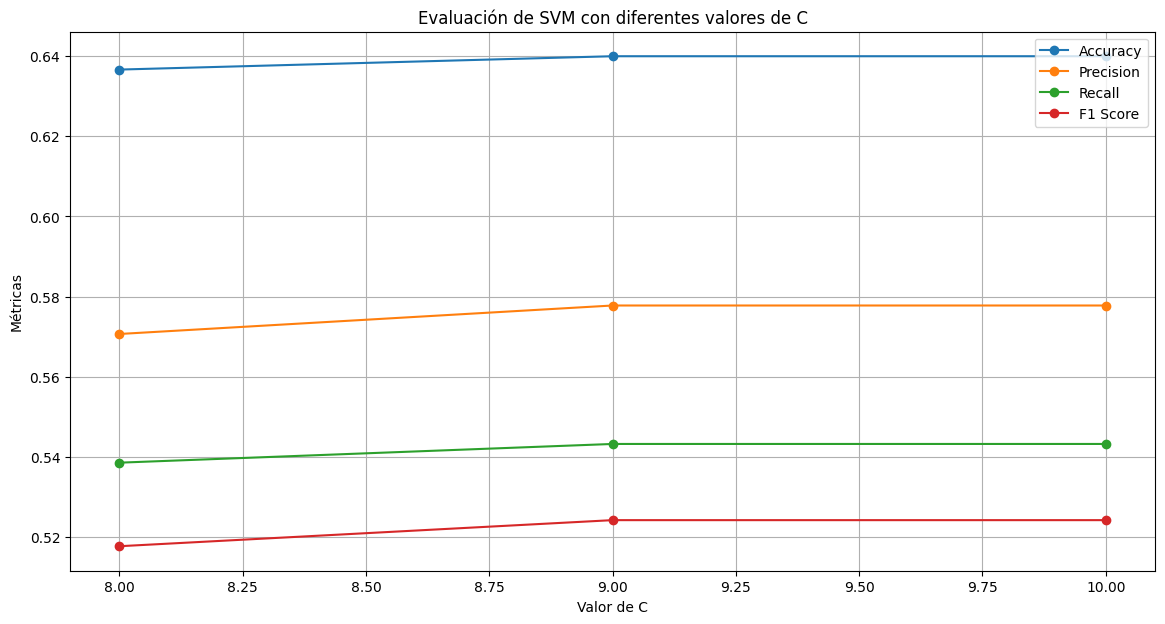

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Carga el dataset
df = pd.read_csv("credito.csv")  # Asegúrate de que el nombre del archivo sea correcto

# Seleccionar características y variable objetivo
X = df[["edad", "alojamiento", "monto", "duracion_prestamo", "proposito", "trabajador_extranjero"]]
y = df["telefono"]

# Escalado de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Valores de C a evaluar desde 1 hasta 10
C_values = np.arange(8, 11)
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for C in C_values:
    # Crear y entrenar el modelo
    svc = SVC(kernel='linear', C=C)
    svc.fit(X_train, y_train)

    # Evaluar el modelo
    y_pred = svc.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, average='macro'))
    recall_scores.append(recall_score(y_test, y_pred, average='macro'))
    f1_scores.append(f1_score(y_test, y_pred, average='macro'))

# Graficar los resultados para cada métrica
plt.figure(figsize=(14, 7))
plt.plot(C_values, accuracy_scores, label='Accuracy', marker='o')
plt.plot(C_values, precision_scores, label='Precision', marker='o')
plt.plot(C_values, recall_scores, label='Recall', marker='o')
plt.plot(C_values, f1_scores, label='F1 Score', marker='o')
plt.xlabel('Valor de C')
plt.ylabel('Métricas')
plt.title('Evaluación de SVM con diferentes valores de C')
plt.legend()
plt.grid(True)
plt.show()

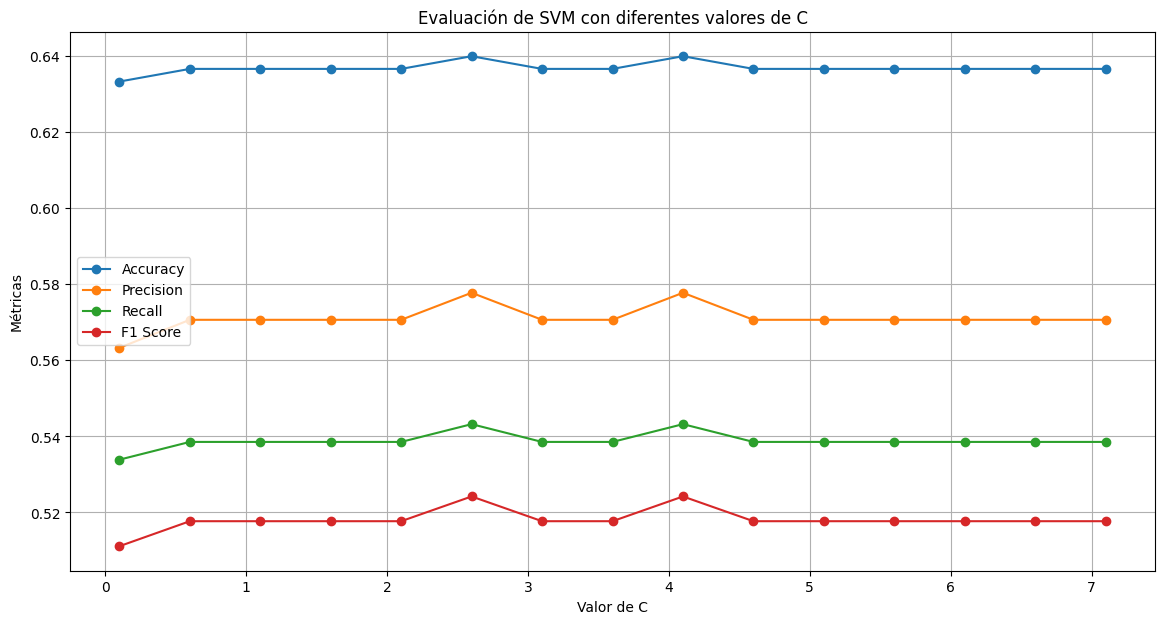

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Asegúrate de que la ruta al archivo CSV es correcta
df = pd.read_csv("credito.csv")

# Seleccionar características y variable objetivo
X = df[["edad", "alojamiento", "monto", "duracion_prestamo", "proposito", "trabajador_extranjero"]]
y = df["telefono"]

# Escalado de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Valores de C a evaluar desde 0.1 hasta 2.0 en incrementos de 0.1
C_values = np.arange(0.1, 7.5, 0.5)
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for C in C_values:
    # Crear y entrenar el modelo
    svc = SVC(kernel='linear', C=C)
    svc.fit(X_train, y_train)

    # Evaluar el modelo
    y_pred = svc.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, average='macro'))
    recall_scores.append(recall_score(y_test, y_pred, average='macro'))
    f1_scores.append(f1_score(y_test, y_pred, average='macro'))

# Graficar los resultados
plt.figure(figsize=(14, 7))
plt.plot(C_values, accuracy_scores, label='Accuracy', marker='o')
plt.plot(C_values, precision_scores, label='Precision', marker='o')
plt.plot(C_values, recall_scores, label='Recall', marker='o')
plt.plot(C_values, f1_scores, label='F1 Score', marker='o')
plt.xlabel('Valor de C')
plt.ylabel('Métricas')
plt.title('Evaluación de SVM con diferentes valores de C')
plt.legend()
plt.grid(True)
plt.show()

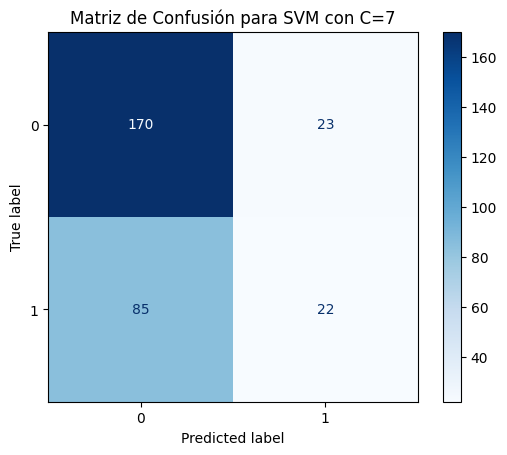

              precision    recall  f1-score  support
1              0.666667  0.880829  0.758929   193.00
2              0.488889  0.205607  0.289474   107.00
accuracy       0.640000  0.640000  0.640000     0.64
macro avg      0.577778  0.543218  0.524201   300.00
weighted avg   0.603259  0.640000  0.591490   300.00


In [15]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv("credito.csv")   # Asegúrate de que la ruta al archivo sea correcta

# Seleccionar características y variable objetivo
X = df[["edad", "alojamiento", "monto", "duracion_prestamo", "proposito", "trabajador_extranjero"]]
y = df["telefono"]

# Escalado de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42) #Held out

# Configurar el modelo SVM con C=0.3
svc = SVC(kernel='linear', C=7)
svc.fit(X_train, y_train)

# Evaluar el modelo
y_pred = svc.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)

# Crear el DataFrame a partir del reporte de clasificación
report_df = pd.DataFrame(report).transpose()

# Crear y mostrar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión para SVM con C=7')
plt.show()

# Imprimir el reporte de clasificación
print(report_df)